In [9]:
# Loading common data related modules
import numpy as np
import pandas as pd
import math 
import os
 
# Loading modelling algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.ensemble     import AdaBoostRegressor
from sklearn.ensemble     import RandomForestRegressor
 
# Loading tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import r2_score
 
# Loading visualisation modules
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
 
# Configure visualisations 
#%matplotlib inline
 
# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')
 


In [62]:
#-----------------------------------------------------------------------------
# Read data
base_dir = os.path.abspath('')
data_dir = os.path.join(base_dir,'data')
data_file = os.path.join(data_dir,'diamonds.csv') 
print(data_file)
diamonds = pd.read_csv(data_file)
 
#-----------------------------------------------------------------------------
# Review and clean the data (may be a repetitive task)
# remove unnecessary columns
diamonds.head()
diamonds.drop(['Unnamed: 0'] , axis=1 , inplace=True)
diamonds.head()
 
# review the data and get intuition about it
diamonds.shape
diamonds.info()
 


/Users/aleksandramolenda/Python_ML/data/diamonds.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<AxesSubplot:>

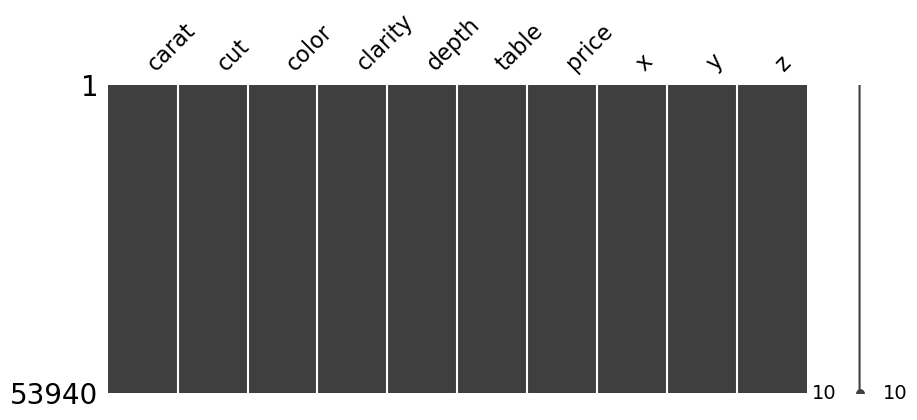

In [15]:
# # find and eliminate nulls
diamonds.isnull().sum()
msno.matrix(diamonds, figsize=(10,4)) # just to visualize. no missing values.
 


In [27]:
# search for illogical values
diamonds.describe()
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]
len(diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]
# always check after execution
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]
 


,carat,cut,color,clarity,depth,table,price,x,y,z


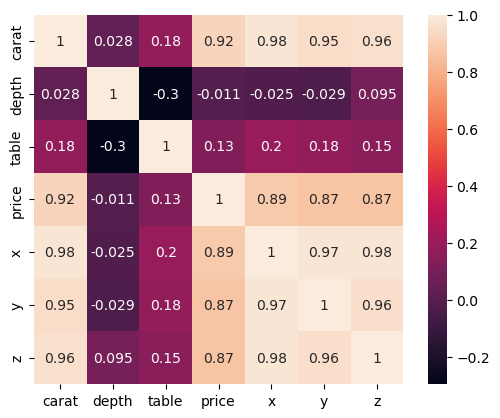

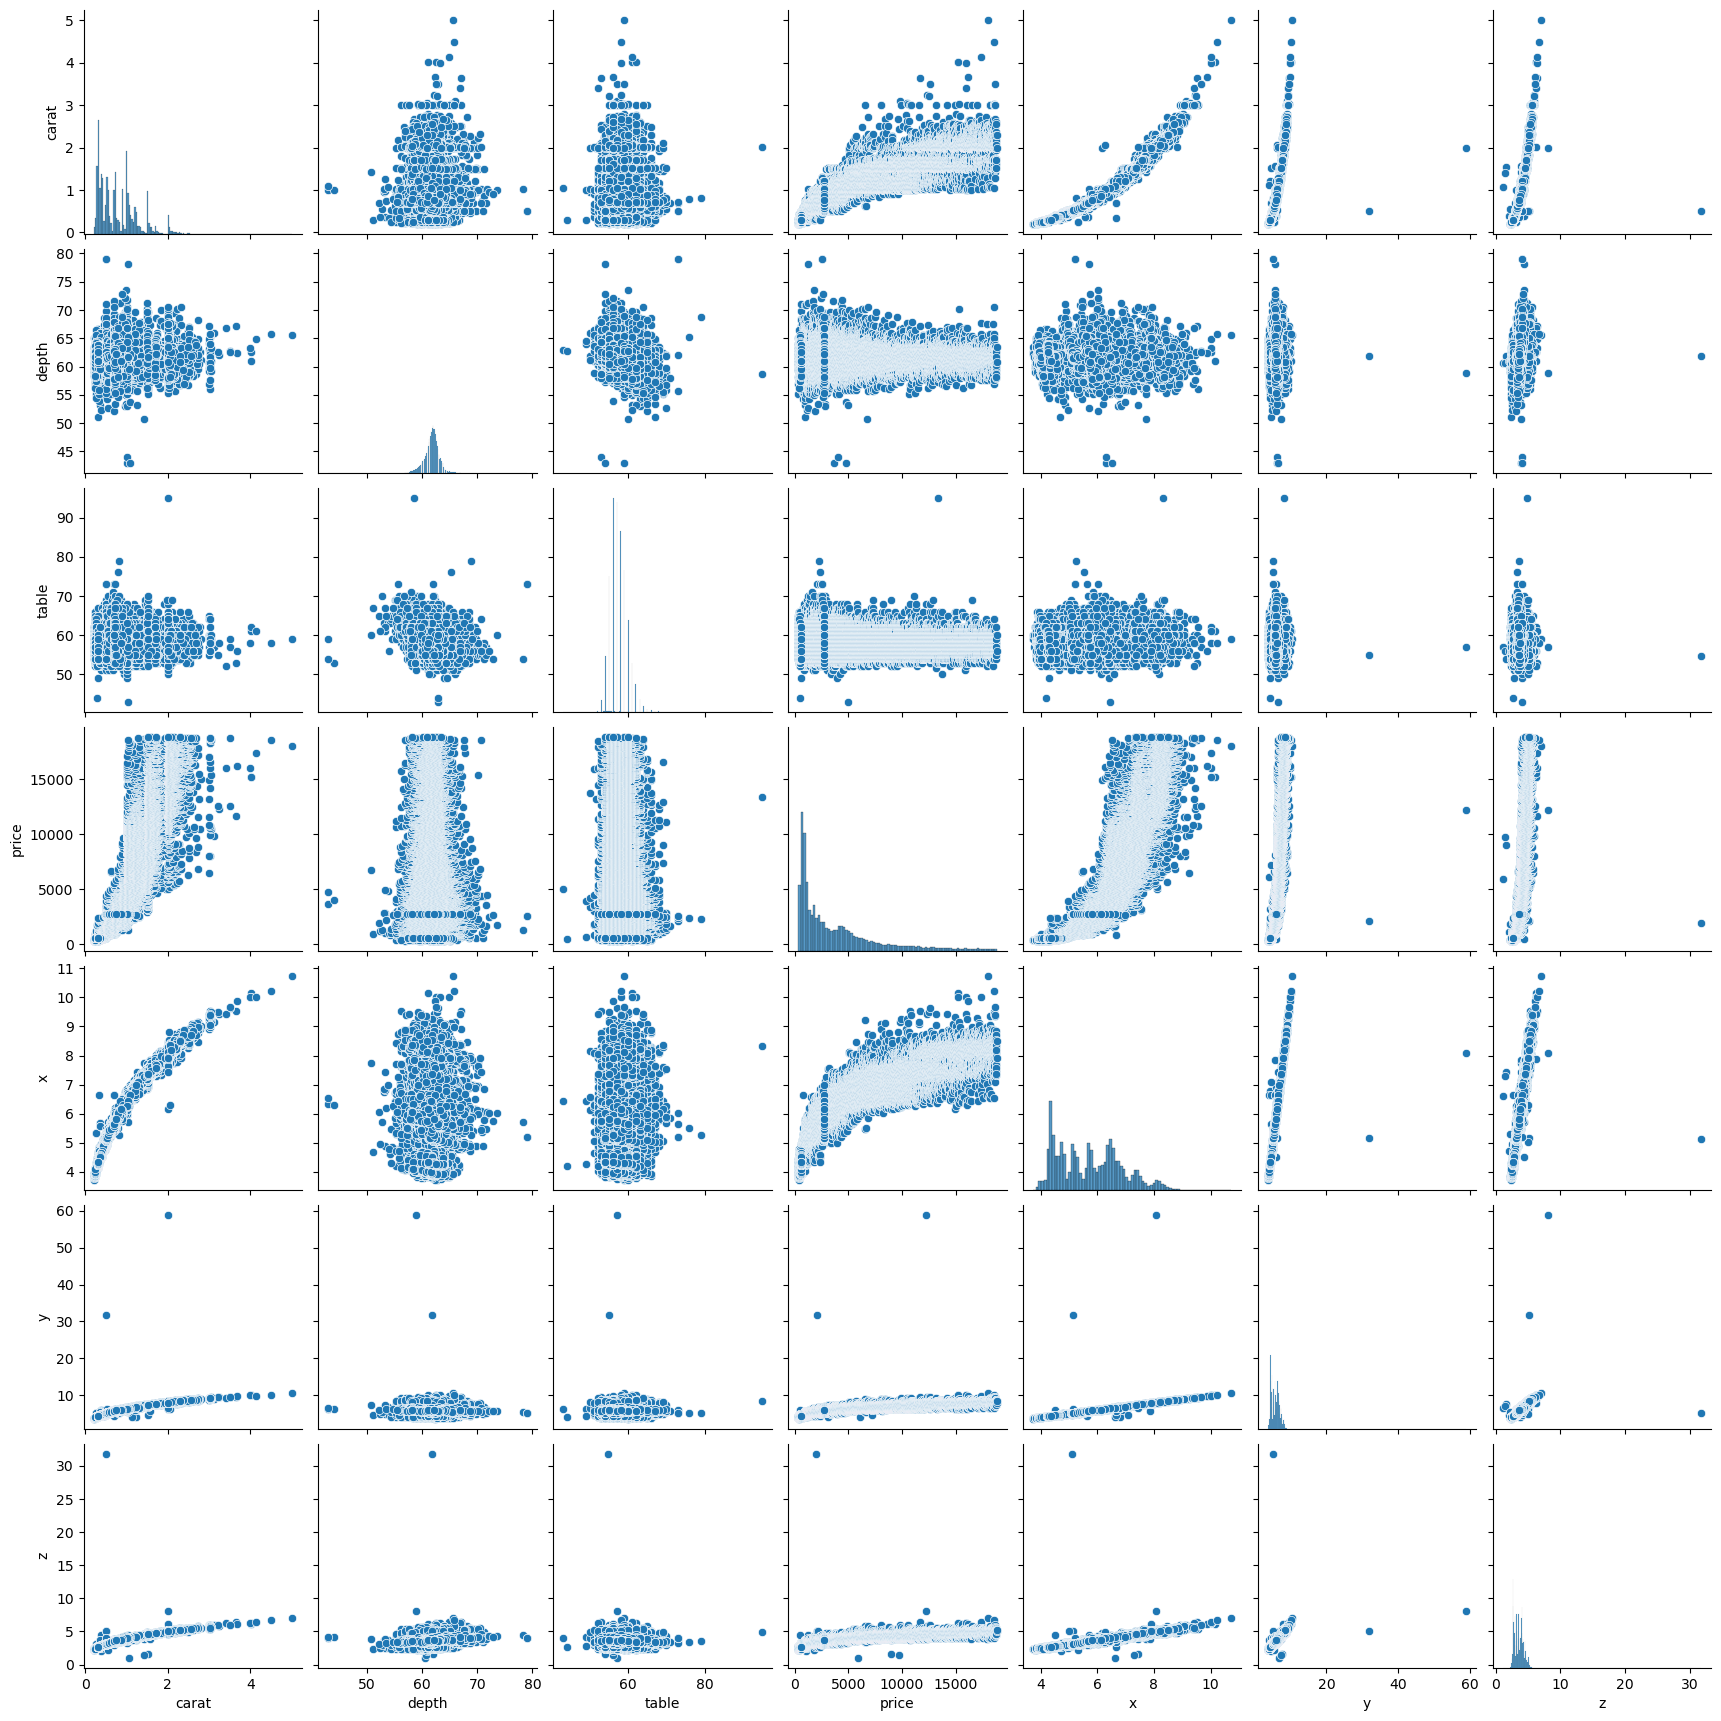

In [29]:
#Detect dependencies in the data
corr = diamonds.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
sns.pairplot(diamonds)


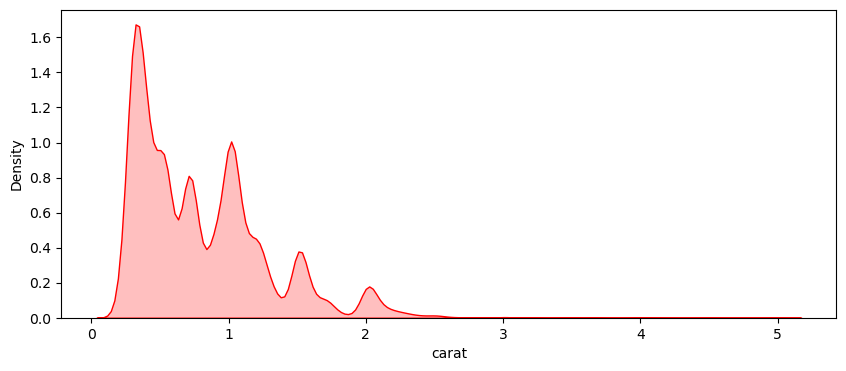

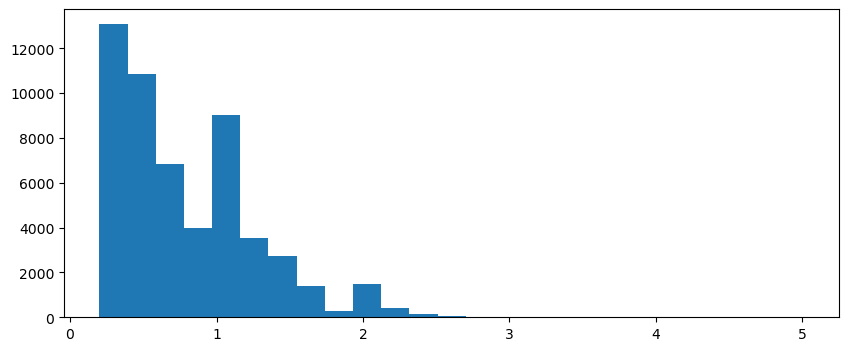

In [67]:
# check distribution
plt.figure(1,figsize=(10,4))
plt.clf() 
sns.kdeplot(diamonds['carat'], shade=True , color='r')
plt.show()


plt.figure(1,figsize=(10,4))
plt.clf() 
plt.hist(diamonds['carat'], bins=25)
plt.show()



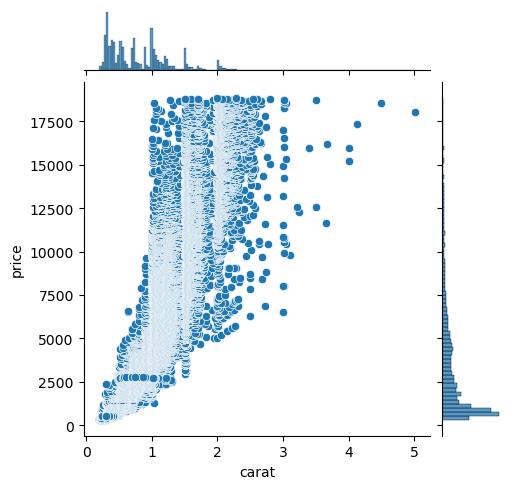

In [69]:
# check correlation graph
sns.jointplot(x='carat' , y='price' , data=diamonds , size=5)#,hue = 'cut')


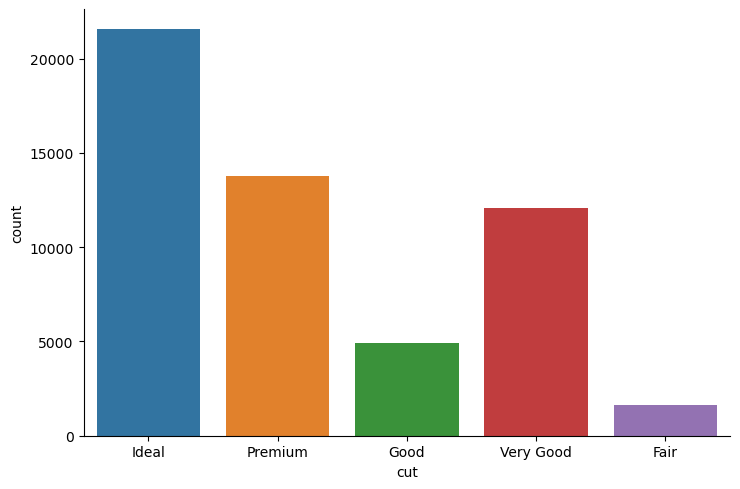

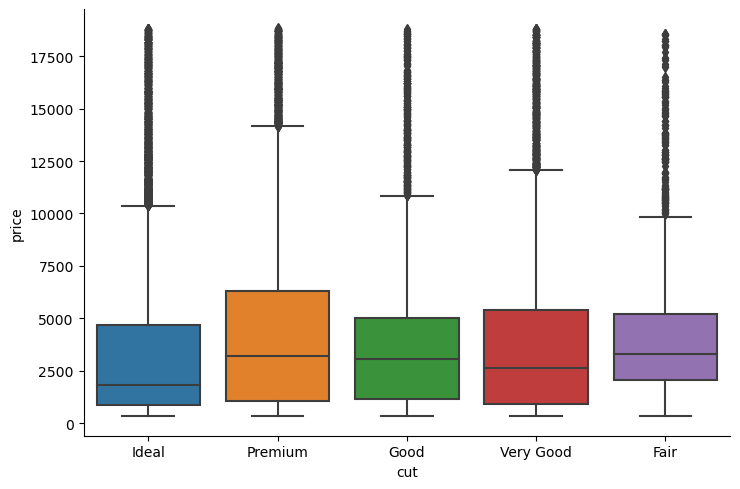

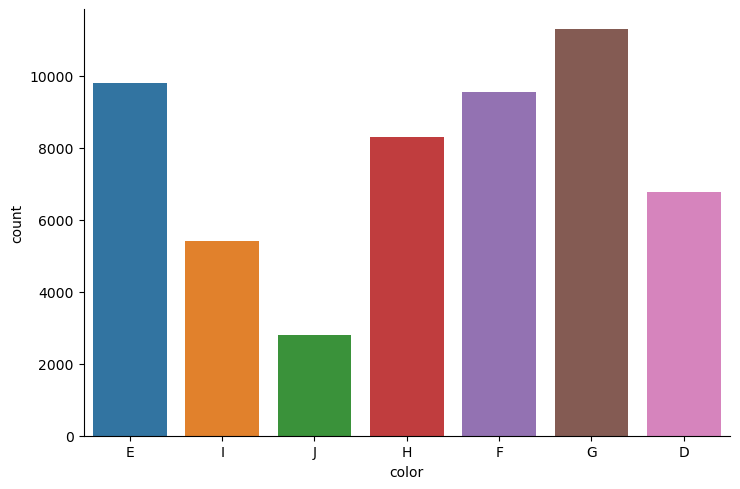

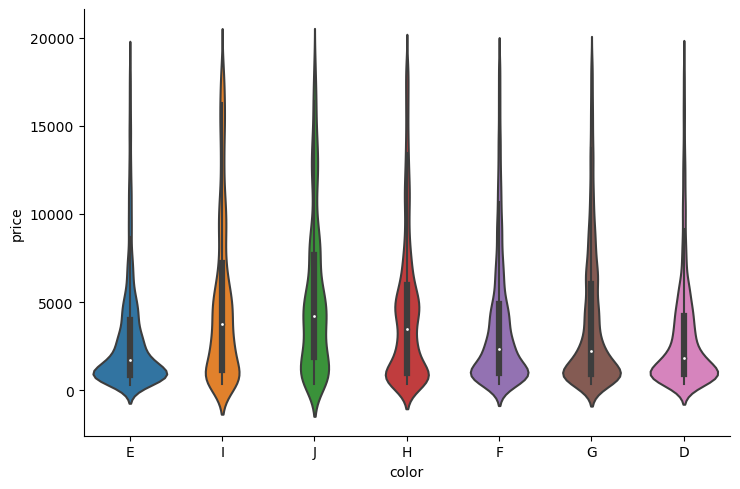

In [65]:
#
# analyze feature by feature, create hypotesis, try to find evidence
sns.factorplot(x='cut', data=diamonds , kind='count',aspect=1.5)
sns.factorplot(x='cut', y='price', data=diamonds, kind='box' ,aspect=1.5)
#
sns.factorplot(x='color', data=diamonds , kind='count',aspect=1.5)
sns.factorplot(x='color', y='price' , data=diamonds , kind='violin', 
               aspect=1.5)


In [ ]:
# #
# # try to use different visualisation methods
# sns.factorplot(x='clarity', data=diamonds , kind='count',aspect=1.5)
# sns.factorplot(x='clarity', y='price' , data=diamonds , kind='violin', 
#                aspect=1.5)
# #
# labels = diamonds.clarity.unique().tolist()
# sizes = diamonds.clarity.value_counts().tolist()
# colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', 
#           '#16F5A7','#ff9999','#66b3ff']
# explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=0)
# plt.axis('equal')
# plt.title("Percentage of Clarity Categories")
# plt.plot()
# fig=plt.gcf()
# fig.set_size_inches(6,6)
# plt.show()
# #
# # try to find specific groups/classifications - repetitive process
# sns.boxplot(x='clarity', y='price', data=diamonds)
# #
# plt.hist('depth' , data=diamonds , bins=25)
# sns.jointplot(x='depth', y='price', data=diamonds, size=5)
# #
# sns.kdeplot(diamonds['table'] ,shade=True , color='orange')
# sns.jointplot(x='table', y='price', data=diamonds , size=5)
 
# #-----------------------------------------------------------------------------
# # feature engineering - ananlyzing separately xyz doesn't make sense
# sns.kdeplot(diamonds['x'] ,shade=True , color='r' )
# sns.kdeplot(diamonds['y'] , shade=True , color='g' )
# sns.kdeplot(diamonds['z'] , shade= True , color='b')
# plt.xlim(2,10)
# diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']
# diamonds.head()
# #
# plt.figure(figsize=(5,5))
# plt.hist( x=diamonds['volume'] , bins=30 ,color='g')
# plt.xlabel('Volume in mm^3')
# plt.ylabel('Frequency')
# plt.title('Distribution of Diamond\'s Volume')
# plt.xlim(0,1000)
# plt.ylim(0,50000)
# #
# sns.jointplot(x='volume', y='price' , data=diamonds, size=5)
# #
# diamonds.drop(['x','y','z'], axis=1, inplace= True)
# diamonds.head()
# #
# # One hot encoding
# diamonds = pd.get_dummies(diamonds, prefix_sep='_', drop_first=True)
# diamonds.head()
 
# #-----------------------------------------------------------------------------
# # splitting data into features X, and labels y
# X = diamonds.drop(['price'], axis=1)
# y = diamonds['price']
# #
# # splitting data into train and test data
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
#                                                     random_state=66)
 
# #-----------------------------------------------------------------------------
# # scaling values
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# X_train
 
 
# #-----------------------------------------------------------------------------
# # test different algorithms to get the data predictions 
# scores = []
# models = ['Linear Regression', 'Lasso Regression', 'AdaBoost Regression', 
#           'Ridge Regression', 'RandomForest Regression', 
#           'KNeighbours Regression']
 
# #-----------------------------------------------------------------------------
# # Linear regression
# lr = LinearRegression()
# lr.fit(X_train , y_train)
# y_pred = lr.predict(X_test)
# r2 = r2_score(y_test, y_pred)
 
# scores.append(r2)
# print('Linear Regression R2: {0:.2f}'.format(r2))
 
 
# # Lasso
# lasso = Lasso(normalize=True)
# lasso.fit(X_train , y_train)
# y_pred = lasso.predict(X_test)
# r2 = r2_score(y_test, y_pred)
 
# scores.append(r2)
# print('Lasso Regression R2: {0:.2f}'.format(r2))
 
 
# # Adaboost classifier
# adaboost = AdaBoostRegressor(n_estimators=1000)
# adaboost.fit(X_train , y_train)
# y_pred = adaboost.predict(X_test)
# r2 = r2_score(y_test, y_pred)
 
# scores.append(r2)
# print('AdaBoost Regression R2: {0:.2f}'.format(r2))
 
# # Ridge
# ridge = Ridge(normalize=True)
# ridge.fit(X_train , y_train)
# y_pred = ridge.predict(X_test)
# r2 = r2_score(y_test, y_pred)
 
# scores.append(r2)
# print('Ridge Regression R2: {0:.2f}'.format(r2))
 
 
# # Random forest
# randomforest = RandomForestRegressor()
# randomforest .fit(X_train , y_train)
# y_pred = randomforest .predict(X_test)
# r2 = r2_score(y_test, y_pred)
 
# scores.append(r2)
# print('Random Forest R2: {0:.2f}'.format(r2))
 
 
# # K-Neighbours
# kneighbours = KNeighborsRegressor()
# kneighbours.fit(X_train , y_train)
# y_pred = kneighbours.predict(X_test)
# r2 = r2_score(y_test, y_pred)
 
# scores.append(r2)
# print('K-Neighbours Regression R2: {0:.2f}'.format(r2))
 
 
# #-----------------------------------------------------------------------------
# ranking = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : scores})
# ranking = ranking.sort_values(by='R2-Scores' ,ascending=False)
# ranking
 
# sns.barplot(x='R2-Scores' , y='Algorithms' , data=ranking)